In [ ]:
import pandas as pd

data = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/FoodBalance.csv",encoding = 'latin1')
data.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020'],
      dtype='object')

In [ ]:
columns_to_drop = ['Area Code', 'Area Code (M49)','Area Code', 'Area Code (M49)','Element Code', 'Item Code (CPC)','Item Code']
data.drop(columns_to_drop,axis=1,inplace=True)
data.head()

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Population,Total Population - Both sexes,1000 persons,29186.00,30117.0,31161.00,32270.00,33371.00,34414.00,35383.00,36296.0,37172.00,38041.75,38928.35
1,Afghanistan,Population,Domestic supply quantity,1000 tonnes,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2170.00,2152.0,2159.00,2196.00,2265.00,2250.00,2228.00,2303.0,2270.00,2236.00,2240.00
3,Afghanistan,Grand Total,Food supply (kcal),million kcal,23112165.71,23661742.0,24559766.20,25870848.40,27593079.40,28259773.00,28775440.50,30507233.0,30799508.70,31052348.87,31832678.75
4,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,59.23,58.0,57.82,57.71,60.17,58.45,58.46,59.5,57.66,56.06,56.64


In [ ]:
id_vars = ['Area', 'Item', 'Element', 'Unit']
data = pd.melt(data, id_vars=id_vars,var_name='Year', value_name='Value')
data.head()

,Area,Item,Element,Unit,Year,Value
0,Afghanistan,Population,Total Population - Both sexes,1000 persons,Y2010,29186.00
1,Afghanistan,Population,Domestic supply quantity,1000 tonnes,Y2010,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,Y2010,2170.00
3,Afghanistan,Grand Total,Food supply (kcal),million kcal,Y2010,23112165.71
4,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,Y2010,59.23


In [ ]:
cereal_crops=['Cereals - Excluding Beer','Wheat and products','Rice and products',
              'Barley and products','Maize and products','Rye and products',
              'Millet and products','Cereals, Other'
              ]
elements = ['Production','Losses']

data = data[data['Item'].isin(cereal_crops) & data['Element'].isin(elements)]
data.head()

,Area,Item,Element,Unit,Year,Value
20,Afghanistan,Cereals - Excluding Beer,Production,1000 tonnes,Y2010,5957.0
27,Afghanistan,Cereals - Excluding Beer,Losses,1000 tonnes,Y2010,837.0
39,Afghanistan,Wheat and products,Production,1000 tonnes,Y2010,4532.0
46,Afghanistan,Wheat and products,Losses,1000 tonnes,Y2010,678.0
57,Afghanistan,Rice and products,Production,1000 tonnes,Y2010,672.0


In [ ]:
data = data.pivot_table(index=['Area', 'Item', 'Year','Unit'], columns='Element', values='Value').reset_index()
data.head()

Element,Area,Item,Year,Unit,Losses,Production
0,Afghanistan,Barley and products,Y2010,1000 tonnes,65.0,437.0
1,Afghanistan,Barley and products,Y2011,1000 tonnes,46.0,306.0
2,Afghanistan,Barley and products,Y2012,1000 tonnes,70.0,504.0
3,Afghanistan,Barley and products,Y2013,1000 tonnes,77.0,514.0
4,Afghanistan,Barley and products,Y2014,1000 tonnes,77.0,521.0


In [ ]:
data = data[data['Production'] != 0]

In [ ]:
data['Loss Percentage'] = (data['Losses'] / data['Production']) * 100
data['Loss Percentage'] = data['Loss Percentage'].round(2)
data.head()

Element,Area,Item,Year,Unit,Losses,Production,Loss Percentage
0,Afghanistan,Barley and products,Y2010,1000 tonnes,65.0,437.0,14.87
1,Afghanistan,Barley and products,Y2011,1000 tonnes,46.0,306.0,15.03
2,Afghanistan,Barley and products,Y2012,1000 tonnes,70.0,504.0,13.89
3,Afghanistan,Barley and products,Y2013,1000 tonnes,77.0,514.0,14.98
4,Afghanistan,Barley and products,Y2014,1000 tonnes,77.0,521.0,14.78


In [ ]:
data.isnull().sum()

Element
Area                 0
Item                 0
Year                 0
Unit                 0
Losses             209
Production          83
Loss Percentage    292
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Element
Area               0
Item               0
Year               0
Unit               0
Losses             0
Production         0
Loss Percentage    0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.to_csv("Food_ProductionANDLoss.csv",index=False)

**Data Visualization (All cereal crops)**

In [ ]:
mean_loss = data.groupby('Area')['Losses'].mean().reset_index()
mean_production = data.groupby('Area')['Production'].mean().reset_index()
mean_loss_percentage = data.groupby('Area')['Loss Percentage'].mean().reset_index()

top10_loss = mean_loss.nlargest(10, 'Losses')
top10_production = mean_production.nlargest(10, 'Production')
top10_loss_percentage = mean_loss_percentage.nlargest(10, 'Loss Percentage')

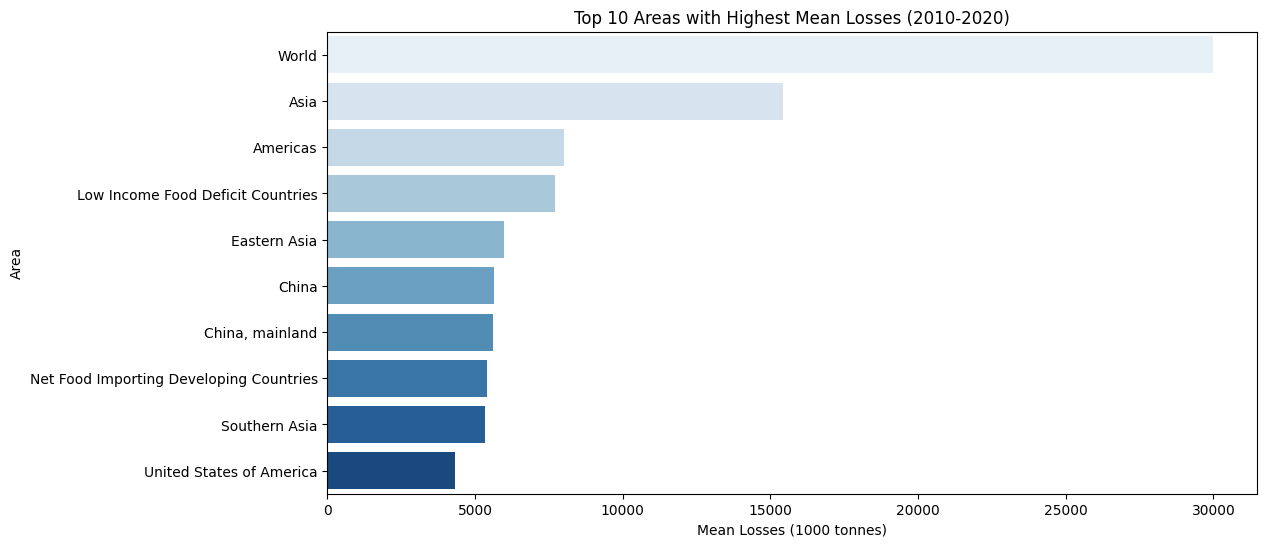

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Losses', y='Area', data=top10_loss, palette='Blues')
plt.xlabel('Mean Losses (1000 tonnes)')
plt.ylabel('Area')
plt.title('Top 10 Areas with Highest Mean Losses (2010-2020)')
plt.show()

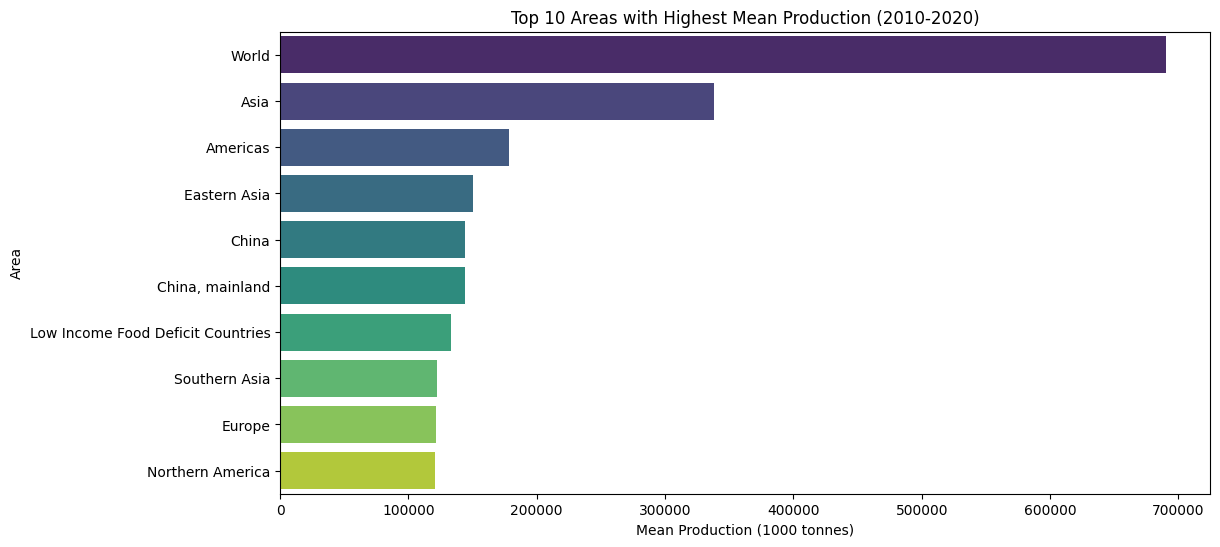

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='Area', data=top10_production, palette='viridis')
plt.xlabel('Mean Production (1000 tonnes)')
plt.ylabel('Area')
plt.title('Top 10 Areas with Highest Mean Production (2010-2020)')
plt.show()

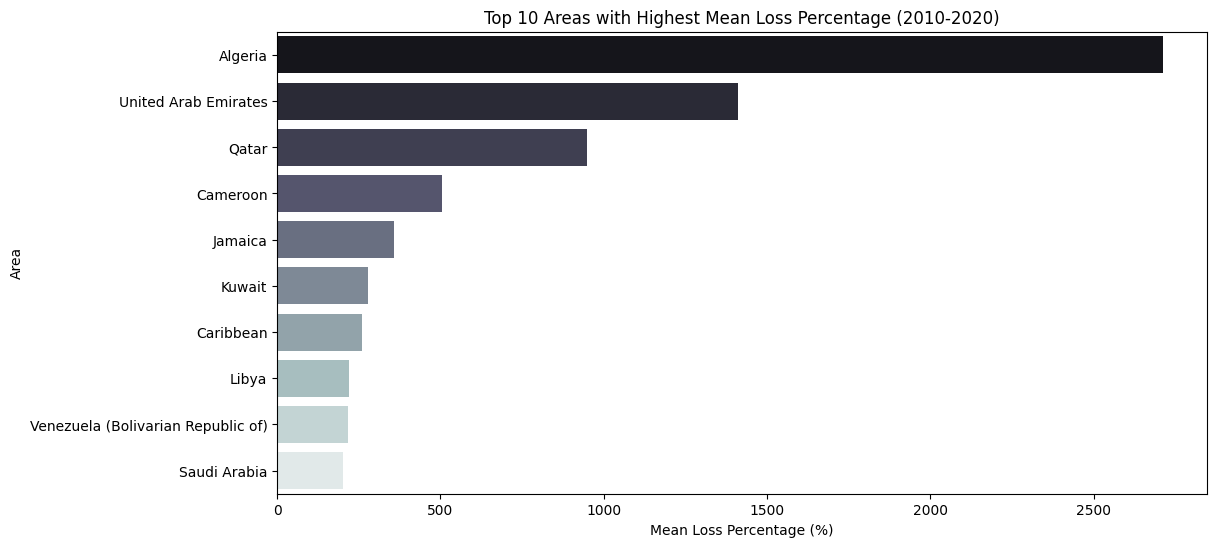

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Loss Percentage', y='Area', data=top10_loss_percentage, palette='bone')
plt.xlabel('Mean Loss Percentage (%)')
plt.ylabel('Area')
plt.title('Top 10 Areas with Highest Mean Loss Percentage (2010-2020)')
plt.show()

**Data Visualization (Rice Only)**

In [ ]:
rice = data[data['Item'] == 'Rice and products']
rice.to_csv("rice_only (FP n FW)1.csv",index=False)


In [ ]:
rice = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/rice_only (FP n FW).csv")

In [ ]:
rice_loss = rice.groupby('Area')['Losses'].mean().reset_index()
rice_production = rice.groupby('Area')['Production'].mean().reset_index()
rice_loss_percentage = rice.groupby('Area')['Loss Percentage'].mean().reset_index()

top10_rice_loss = rice_loss.nlargest(10, 'Losses')
top10_rice_production = rice_production.nlargest(10, 'Production')
top10_rice_loss_percentage = rice_loss_percentage.nlargest(10, 'Loss Percentage')

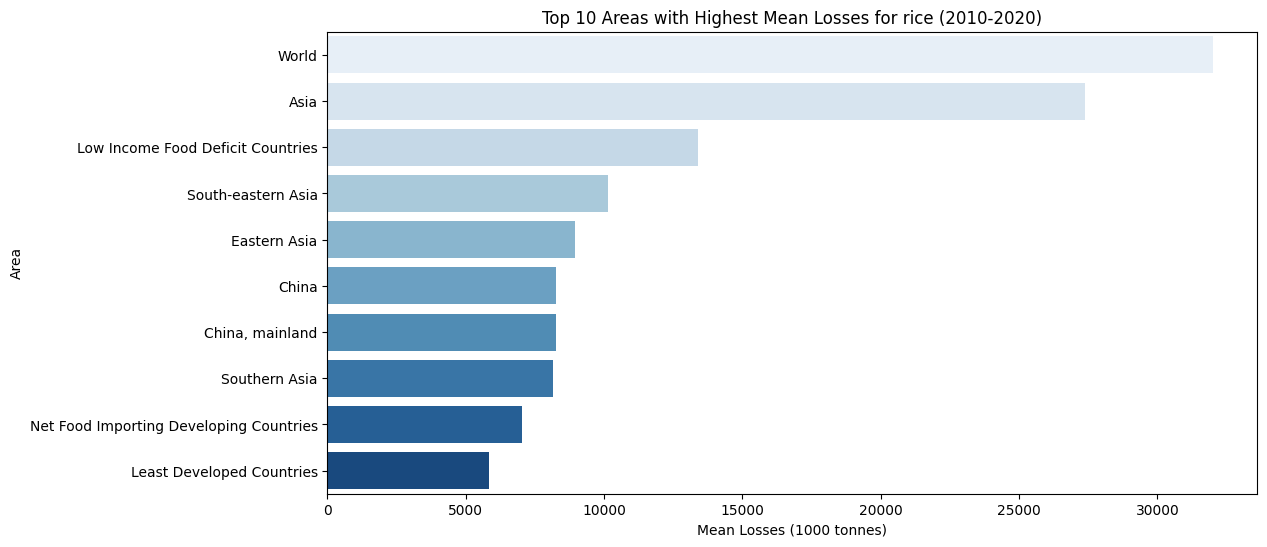

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Losses', y='Area', data=top10_rice_loss, palette='Blues')
plt.xlabel('Mean Losses (1000 tonnes)')
plt.ylabel('Area')
plt.title('Top 10 Areas with Highest Mean Losses for rice (2010-2020)')
plt.show()

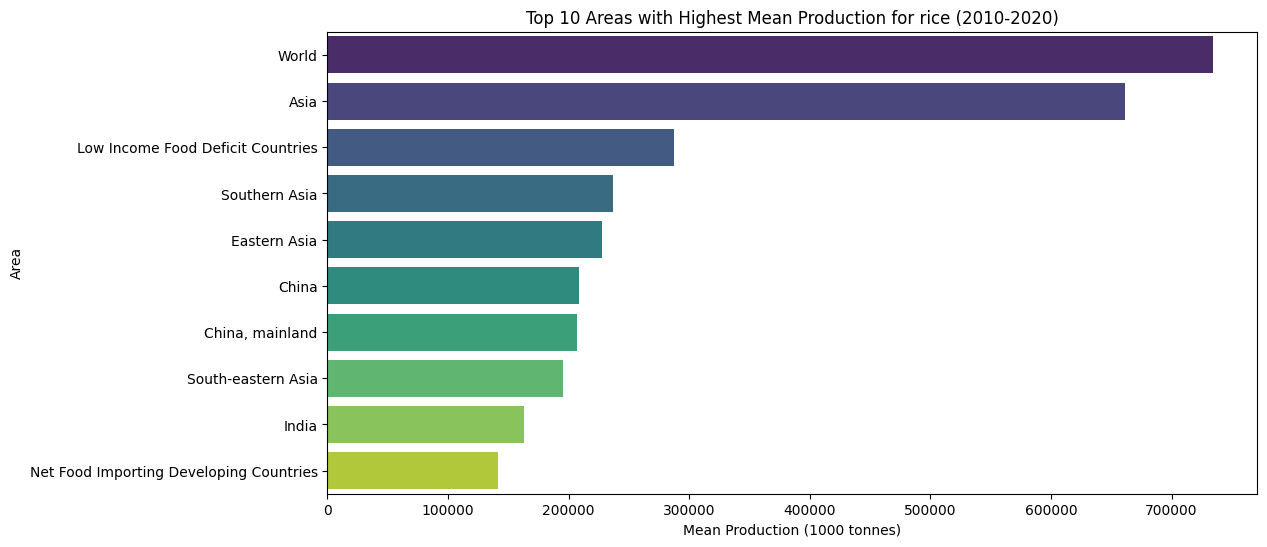

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='Area', data=top10_rice_production, palette='viridis')
plt.xlabel('Mean Production (1000 tonnes)')
plt.ylabel('Area')
plt.title('Top 10 Areas with Highest Mean Production for rice (2010-2020)')
plt.show()

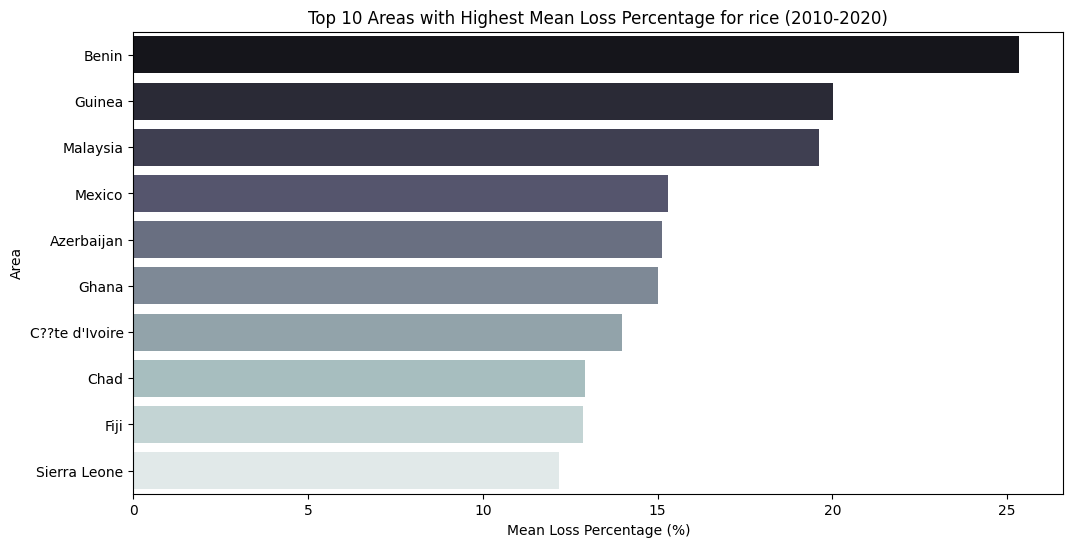

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Loss Percentage', y='Area', data=top10_rice_loss_percentage, palette='bone')
plt.xlabel('Mean Loss Percentage (%)')
plt.ylabel('Area')
plt.title('Top 10 Areas with Highest Mean Loss Percentage for rice (2010-2020)')
plt.show()